# Predicting Voice Disorder Severity using CAPE-V Parameters with Linear Regression


## Background
This project aims to utilize a linear regression model to predict the severity of voice disorders based on various parameters from the Consensus Auditory-Perceptual Evaluation of Voice (CAPE-V). The goal is to establish a predictive model that helps clinicians assess the severity of voice disorders more quantitatively.
### About CAPE-V
CAPE-V is a standardized tool used by speech-language pathologists to assess voice quality and severity of voice disorders. It measures six parameters: overall severity, roughness, breathiness, strain, pitch, and loudness. Each parameter is rated on a scale from 0 to 100, providing a detailed profile of voice quality.
<p align="center">
    <img src="CAPE_VFORM.jpg" width="500">
</p>

## Data Description
The dataset consists of anonymized voice assessments from individuals diagnosed with various voice disorders. Each record in the dataset includes:

- **Overall Severity**: The composite severity score (target variable).
- **Roughness**: Perceptual quality of voice irregularity.
- **Breathiness**: Perception of audible air escape in the voice.
- **Strain**: Perception of excessive vocal effort.
- **Pitch**: Frequency characteristics of the voice, whether the patient can maintain one pitch during the sustained phonation task
- **Loudness**: Intensity level of the voice.

## References
- [Consensus Auditory-Perceptual Evaluation of Voice (CAPE-V)](https://pubs.asha.org/doi/abs/10.1044/1058-0360%282010/09-0105%29)

## The Dataset

The Perceptual Voice Qualities Database (PVQD) is a comprehensive resource developed with support from The Voice Foundation’s Advancing Scientific Voice Research Grant. Hosted by St. John’s University, this database comprises 296 audio files in .wav format, featuring the sustained vowels /a/ and /i/, along with sentences from the Consensus Auditory-Perceptual Evaluation of Voice (CAPE-V). These recordings, captured in a quiet clinical setting using high-quality equipment, have been meticulously rated by experienced voice professionals using both the CAPE-V and GRBAS scales. This data is aimed at providing standardized, high-quality auditory materials to aid in the training and education of pre-service clinical voice professionals. Each audio file in the PVQD has undergone rigorous perceptual assessment, ensuring a valuable tool for research and education in acoustics, voice output, voice disorder, auditory perception, perceptual assessment, perceptual learning, and speech-language pathology. The PVQD is licensed under CC BY 4.0, promoting open access to this valuable resource.

Dataset Source: [Perceptual Voice Qualities Database (PVQD) Voice Foundation](https://voicefoundation.org/health-science/videos-education/pvqd/)

---
### Linear Regression
Linear regression is a fundamental statistical approach that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. In this project, linear regression will help us understand how well the CAPE-V parameters can predict the severity of voice disorders.



## Data Exploration and Preprocessing
Clean the data and handle missing values.

In [9]:

import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions
import numpy as np 
import pandas as pd 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import seaborn as sns
sns.set_theme()

df = pd.read_csv('Combined_PVQD_CAPEV.csv', delimiter=',')
df.dataframeName = 'Combined_PVQD_CAPEV.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

df.head(10)

There are 297 rows and 10 columns


,Participant ID,Gender,Age,Diagnosis,Severity,Roughness,Pitch,Loudness,Breathiness,Strain
0,BL01,M,46,NaN,14.500000,9.500000,6.333333,9.666667,4.500000,4.500000
1,BL02,F,76,NaN,73.833333,65.000000,36.166667,54.833333,54.833333,58.333333
2,BL03,F,88,NaN,65.833333,56.166667,41.166667,37.166667,32.333333,44.500000
3,BL04,F,42,NaN,9.500000,6.166667,12.833333,5.833333,6.166667,5.166667
4,BL05,F,75,NaN,43.000000,34.666667,15.333333,29.500000,40.166667,26.666667
5,BL06,F,65,NaN,88.833333,20.166667,63.500000,75.666667,79.833333,81.500000
6,BL07,F,24,NaN,14.833333,12.166667,10.500000,6.333333,7.833333,11.500000
7,BL08,F,27,NaN,17.833333,13.500000,15.166667,5.333333,14.166667,11.166667
8,BL09,M,70,NaN,32.666667,23.166667,12.500000,23.166667,5.666667,37.666667
9,BL10,F,21,NaN,19.333333,9.666667,10.833333,4.166667,20.000000,6.833333


---

Scatterplots to explore the relationship of the predictors variables with severity

---

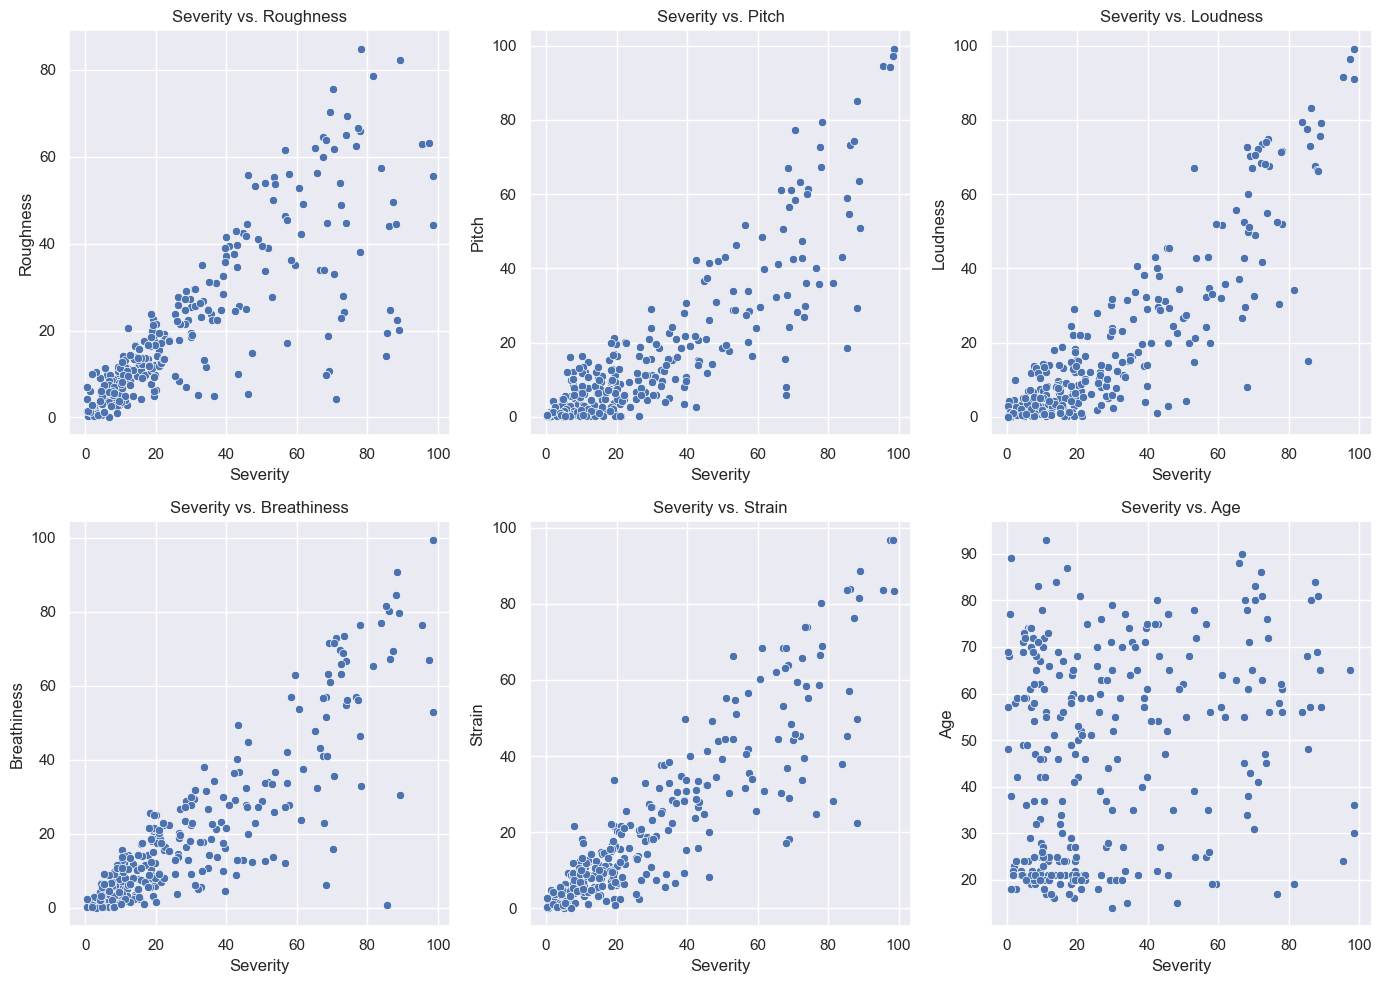

In [4]:
# List of variables to plot with 'Severity'
variables = ['Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Loop through the variables to create scatterplots
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # Plotting on a 2x3 grid
    sns.scatterplot(data=df, x='Severity', y=variable)
    plt.title(f'Severity vs. {variable}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

---


It appears that the CAPE-V parameters such as 'Roughness', 'Pitch', 'Loudness', 'Breathiness', and 'Strain' show a strong linear relationship with severity. However, the relationship between age and severity is not linear, though there is a noticeable trend of younger individuals having lower severity cases. Clinically, age is linked to the occurrence of voice disorders, but the PVQD dataset may not fully represent this trend due to its inclusion of various voice disorders that are not related to age.

---

In [5]:

# Calculating descriptive statistics for selected variables
stats = df[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].describe()

# Adding skewness and kurtosis
stats.loc['skew'] = df[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].skew()
stats.loc['kurtosis'] = df[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].kurt()

print(stats)


            Severity   Roughness       Pitch    Loudness  Breathiness  \
count     296.000000  296.000000  296.000000  296.000000   296.000000   
mean       29.356560   20.699887   16.328829   18.691864    19.778435   
std        25.141730   18.407157   20.139772   22.579619    21.060190   
min         0.333333    0.166667    0.000000    0.000000     0.000000   
25%         9.666667    7.458333    2.656250    3.093750     5.000000   
50%        19.500000   13.708333    9.333333    8.833333    12.208333   
75%        43.041667   27.666667   20.291667   26.875000    27.166667   
max        98.666667   84.833333   99.166667   99.166667    99.500000   
skew        1.005032    1.296683    1.939191    1.598986     1.549618   
kurtosis   -0.069013    1.007225    3.651007    1.742622     1.750984   

              Strain         Age  
count     296.000000  297.000000  
mean       21.089527   46.727273  
std        21.328641   21.737291  
min         0.125000   14.000000  
25%         5.593750 

---
Some observation for the descritpive statistics 
1. Range Variation:
- Significant differences exist in the variable ranges. For example, "Pitch," "Loudness," and "Breathiness" reach nearly 100, while "Severity" and others vary. This can slow down or destabilize gradient descent during training.

2. Skewness and Kurtosis:
- Some variables, like "Pitch" and "Loudness," show high skewness, indicating long tails in their distribution. High kurtosis values suggest the presence of heavy tails or outliers, which can disproportionately influence the regression model. Normalization helps reduce these effects.

There was also a case with no voice ratings.

 Normalizing was applied to the variables to ensure each feature equally contributes to calculations, promoting stable and quicker convergence.

In [6]:

columns_to_check = ['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain']

# Drop rows where all specified columns are missing values
df_cleaned = df.dropna(subset=columns_to_check, how='all')

print("Original DataFrame size:", df.shape)
print("Cleaned DataFrame size:", df_cleaned.shape)

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']]),
                               columns=['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age'])

df_standardized.head(5)

Original DataFrame size: (297, 10)
Cleaned DataFrame size: (296, 10)


,Severity,Roughness,Pitch,Loudness,Breathiness,Strain,Age
0,-0.591913,-0.609483,-0.497147,-0.400382,-0.726694,-0.779122,-0.038035
1,1.772038,2.410754,0.986676,1.603334,1.667329,1.749145,1.346186
2,1.453303,1.930056,1.235362,0.819593,0.597153,1.099466,1.899874
3,-0.791122,-0.790879,-0.173856,-0.570439,-0.647421,-0.747813,-0.222598
4,0.543580,0.760054,-0.049513,0.479478,0.969733,0.261929,1.300045
5,2.369666,-0.029017,2.346156,2.527558,2.856413,2.837160,0.838638
6,-0.578632,-0.464367,-0.289909,-0.548258,-0.568149,-0.450369,-1.053130
7,-0.459107,-0.391808,-0.057803,-0.592621,-0.266915,-0.466024,-0.914708
8,0.131881,0.134239,-0.190435,0.198514,-0.671203,0.778541,1.069341
9,-0.399344,-0.600413,-0.273330,-0.644377,0.010538,-0.669538,-1.191552


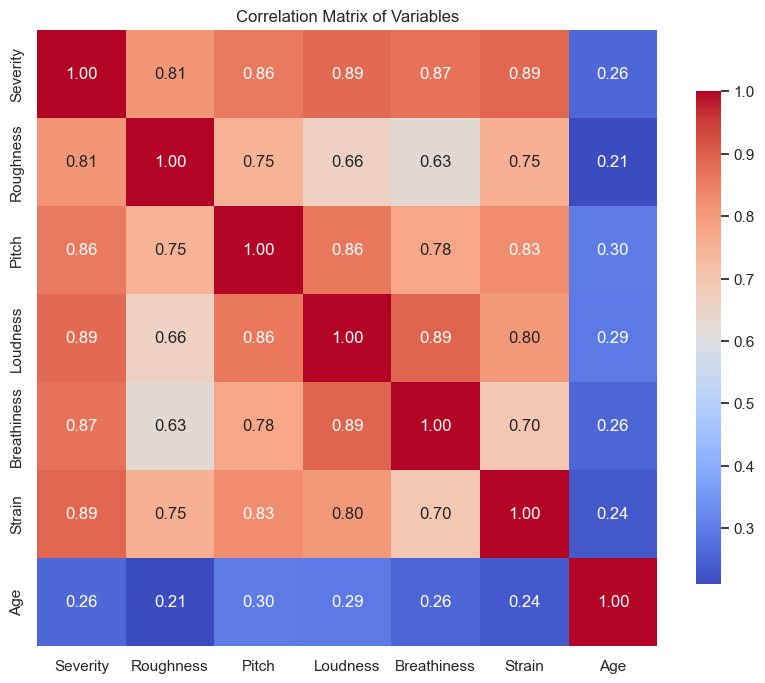

In [17]:
# Calculate the correlation matrix
corr = df_standardized[['Severity', 'Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Age']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Variables')
plt.show()


In [18]:
y = df_standardized['Severity'].values

# Define X with the specified features
X = df_standardized[['Breathiness', 'Roughness','Strain', 'Loudness', 'Pitch']].values

# Split the data into training and testing sets
# Test size is set to 33% of the original data and the data is shuffled to ensure randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

Mean Squared Error on test set: 0.08551399573250164


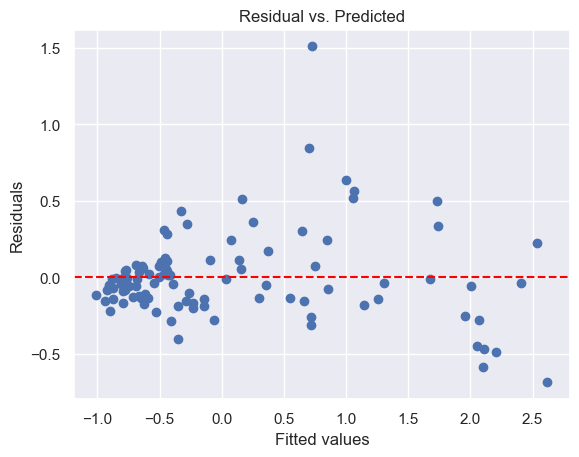

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual vs. Predicted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

## Observation 
The cone-shaped Residual versus Fitted Values plot indicates **heteroscedasticity** in the predicted model. As severity increases, so does the variability across our set of predictors (Roughness, Breathiness, Strain, Loudness, Pitch). Such behavior is typical as real-life data is almost never homoscedastic. Clinically, the cases of mild to moderate severity are less complex than the severe ones. Voices of high severity are inherently complex to rate perceptually and require clinicians to isolate different qualities from a noise-filled acoustic signal.

To illustrate that "The bads are unique in their own ways", I have two cases below, both equally severe but with their unique characteristics:

- BL02 is rated moderate to severely deviant in all 5 subtests. 
- BL06, on the other hand, is not so rough, but the breathiness is extremely pronounced.

Here are the links to play their recordings:

[Case BL02: Both Rough and Breathy (interpreted as Hoarse)](https://drive.google.com/file/d/1eTaHG50ZhO99-z3EOATTPGwMk984Yc7R/view?usp=sharing)

[Case BL06: Breathy, unable to maintain pitch and volume, but not quite rough](https://drive.google.com/file/d/12uJesCEfzdtr0gO8ZMU6rtJSJSVjT0Tu/view?usp=sharing)

The MSE on the test set is 0.085, which is quite satisfactory given that we have used a StandardScaler with all variables (SD=1). Below is the regression equation:


In [30]:
coefficients = model.coef_
intercept = model.intercept_
# Print out coefficients and intercept using f-string for detailed output
print(f"The coefficient of Breathiness is {coefficients[0]}")
print(f"The coefficient of Roughness is {coefficients[1]}")
print(f"The coefficient of Strain is {coefficients[2]}")
print(f"The coefficient of Loudness is {coefficients[3]}")
print(f"The coefficient of Pitch is {coefficients[4]}")
print(f"The intercept is {intercept}")

The coefficient of Breathiness is 0.390313852326528
The coefficient of Roughness is 0.2235207473502701
The coefficient of Strain is 0.3778075718389122
The coefficient of Loudness is 0.08825908513491579
The coefficient of Pitch is 0.0008469584492361015
The intercept is -1.6554304722364715e-16




In conclusion, the linear regression analysis has indicated that breathiness, roughness, and strain significantly contribute to the severity of voice disorders. The coefficients for these features are notably higher, suggesting a stronger impact on the severity ratings compared to other features like loudness and pitch. This aligns with my personal observations during perceptual rating sessions, where these three characteristics were consistently the most prominent indicators of voice disorder severity. This consistency between the analytical results and perceptual experience underscores the reliability of using these features as key indicators in diagnosing and assessing the severity of voice disorders.

---